In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Dell\Downloads\Mall_Customers (1).csv'
df = pd.read_csv(file_path)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


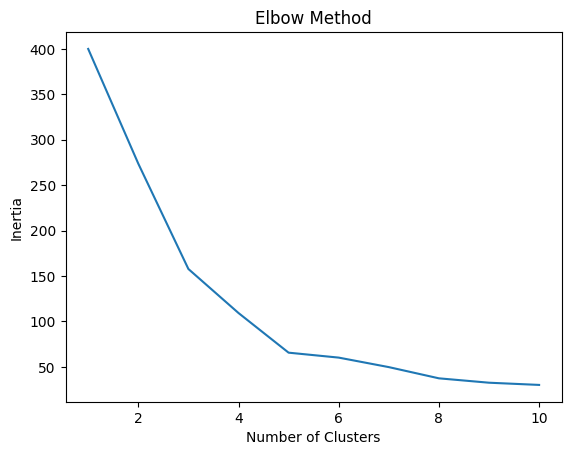

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Fit the K-means model with the optimal number of clusters
optimal_clusters = 5  # Example value from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
df['Cluster'] = clusters


Silhouette Score: 0.5546571631111091


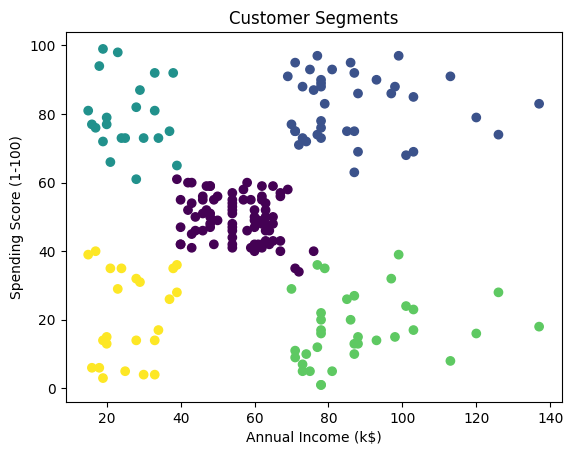

In [5]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering performance
score = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {score}')

# Visualize the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()
